In [ ]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()
#Columns:특성 종류
#Non-Null Count:Null이 아닌 특성의 데이터 개수(누락되지 않은 데이터 개수)
#Dtype:특성의 데이터 타입(밑의 데이터에선 float)
#memory usage:로드된 데이터가 RAM에 얼마만큼의 용량을 차지하는지 표시

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
#데이터를 numpy배열로 회귀 모델이 읽을 수 있게 변경
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
print(target)
print(data[:5])
#레드와인 또는 화이트와인 이므로 클래스는 0 또는 1
#데이터는 [알코올,당도,pH지수]의 형태

[0. 0. 0. ... 1. 1. 1.]
[[9.4  1.9  3.51]
 [9.8  2.6  3.2 ]
 [9.8  2.3  3.26]
 [9.8  1.9  3.16]
 [9.4  1.9  3.51]]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(5197, 3) (1300, 3)
(5197,) (1300,)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7802578410621512
0.7784615384615384


In [ ]:
print(lr.coef_, lr.intercept_)
#아래와 같이 로지스틱회귀 등은 각 가중치가 무엇을 의미하는지 알기 어렵다.

[[ 0.51744363  1.67311799 -0.68632422]] [1.80938433]


# **결정 트리**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9974985568597268
0.8638461538461538


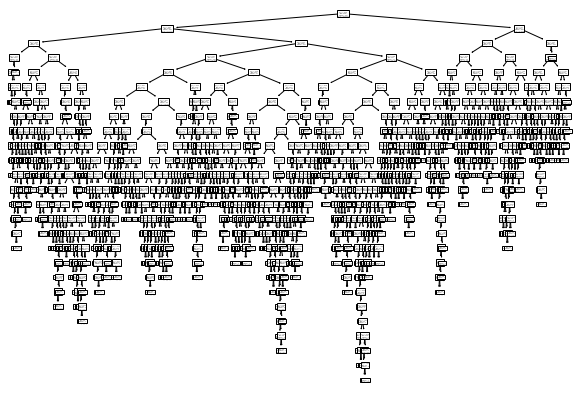

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

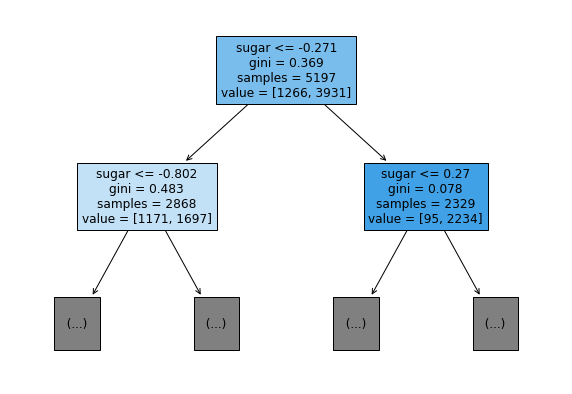

In [ ]:
plt.figure(figsize=(10,7))
#max_depth:최상단 노드 밑에 몇개의 층을 더 표시할건지 결정
#filled:양성 클래스의 경우 파란색, 음성 클래스의 경우 연한 파란색으로 색칠
#feature_names:특성 이름을 지정
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()
#왼쪽이 yes,오른쪽이 no
#gini:지니 불순도
#지니불순도:1-(음성클래스 비율)^2-(양성클래스 비율)^2
#양성클래스:음성클래스 가 5:5 일때 0.5(최댓값)
#양성클래스:음성클래스 가 10:0 또는 0:10 일때 0(최솟값) (이 경우를 가지는 노드를 "순수 노드"라 한다.)
#기본적으로 제한하지 않을 경우 트리 모델은 잎이 순수노드가 될때까지 분할한다.
#이렇게 될경우 모델이 과대적합 될 수 있으므로 가지를 제한하는데
#이를 가지치기 라고 한다.

**가지치기**

In [ ]:
#max_depth : 트리 모델의 분할을 제한한다.
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#트리를 제한하여 점수가 많이 낮아진 것을 볼 수 있다.

0.8437560130844718
0.8584615384615385


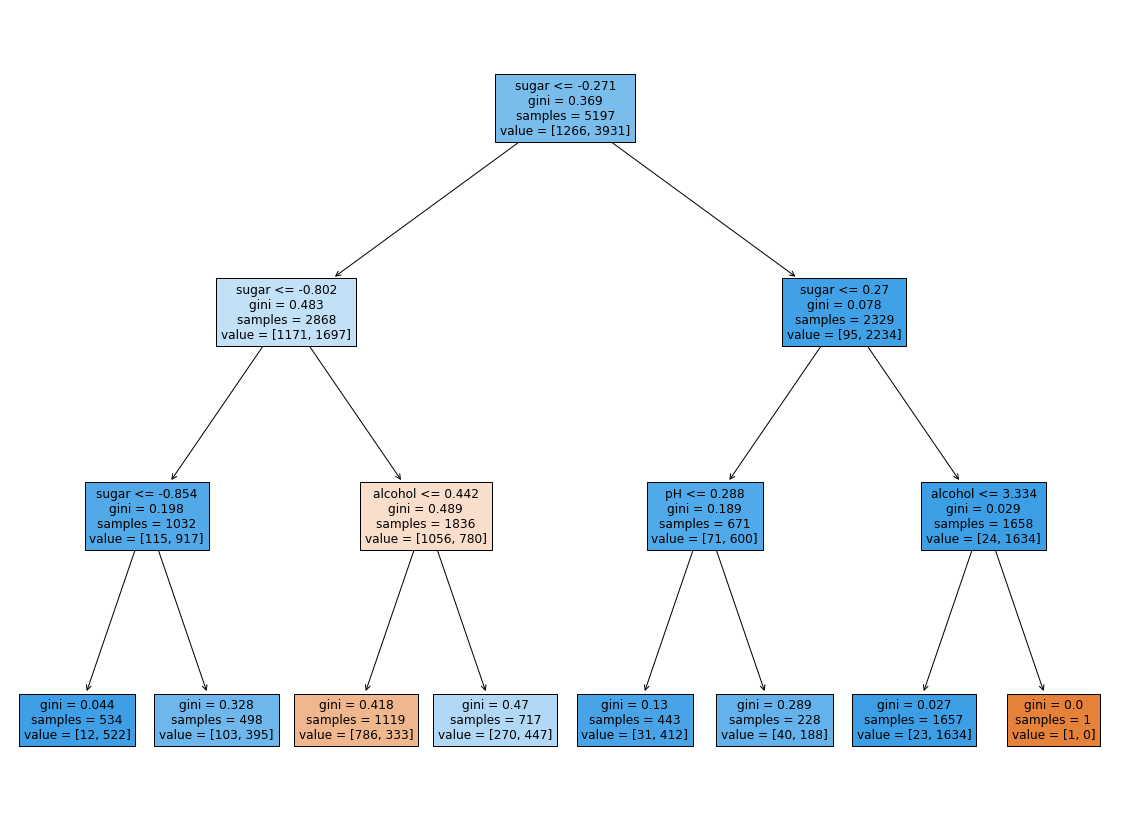

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()
#이전보다 분할 수가 훨씬 적은것을 볼 수 있다.
#결정 트리는 스케일을 조정할 필요가 없다.

In [ ]:
print(dt.feature_importances_)
#[알코올 당도 pH]
#따라서 당도가 와인을 구별하는데 가장 중요한 특성임을 알 수 있다.

[0.12549898 0.87006552 0.0044355 ]


**결정 트리의 규제 매개 변수**

max_depth : 노드의 깊이 제한, default는 None으로 최대 깊이까지 학습해, 과대적합 가능성이 있으므로 제한을 주면 좋다.

min_samples_split : 분할되기 위해 노드가 가져야하는 최소 샘플 수

min_samples_leaf : 리프 노드가 가져야할 최소 샘플 수

min_weight_fraction_leaf : min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율

max_leaf_nodes : 리프 노드의 최대 수

max_features : 각 노드에서 분할에 사용할 변수의 최대 수

min_impurity_decrease : 부모 자식 노드간의 불순도 차의 최솟값. 이조차 차이 안나면 노드를 분할하지 않는다.

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005,max_depth=5 ,random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8666538387531268
0.8684615384615385


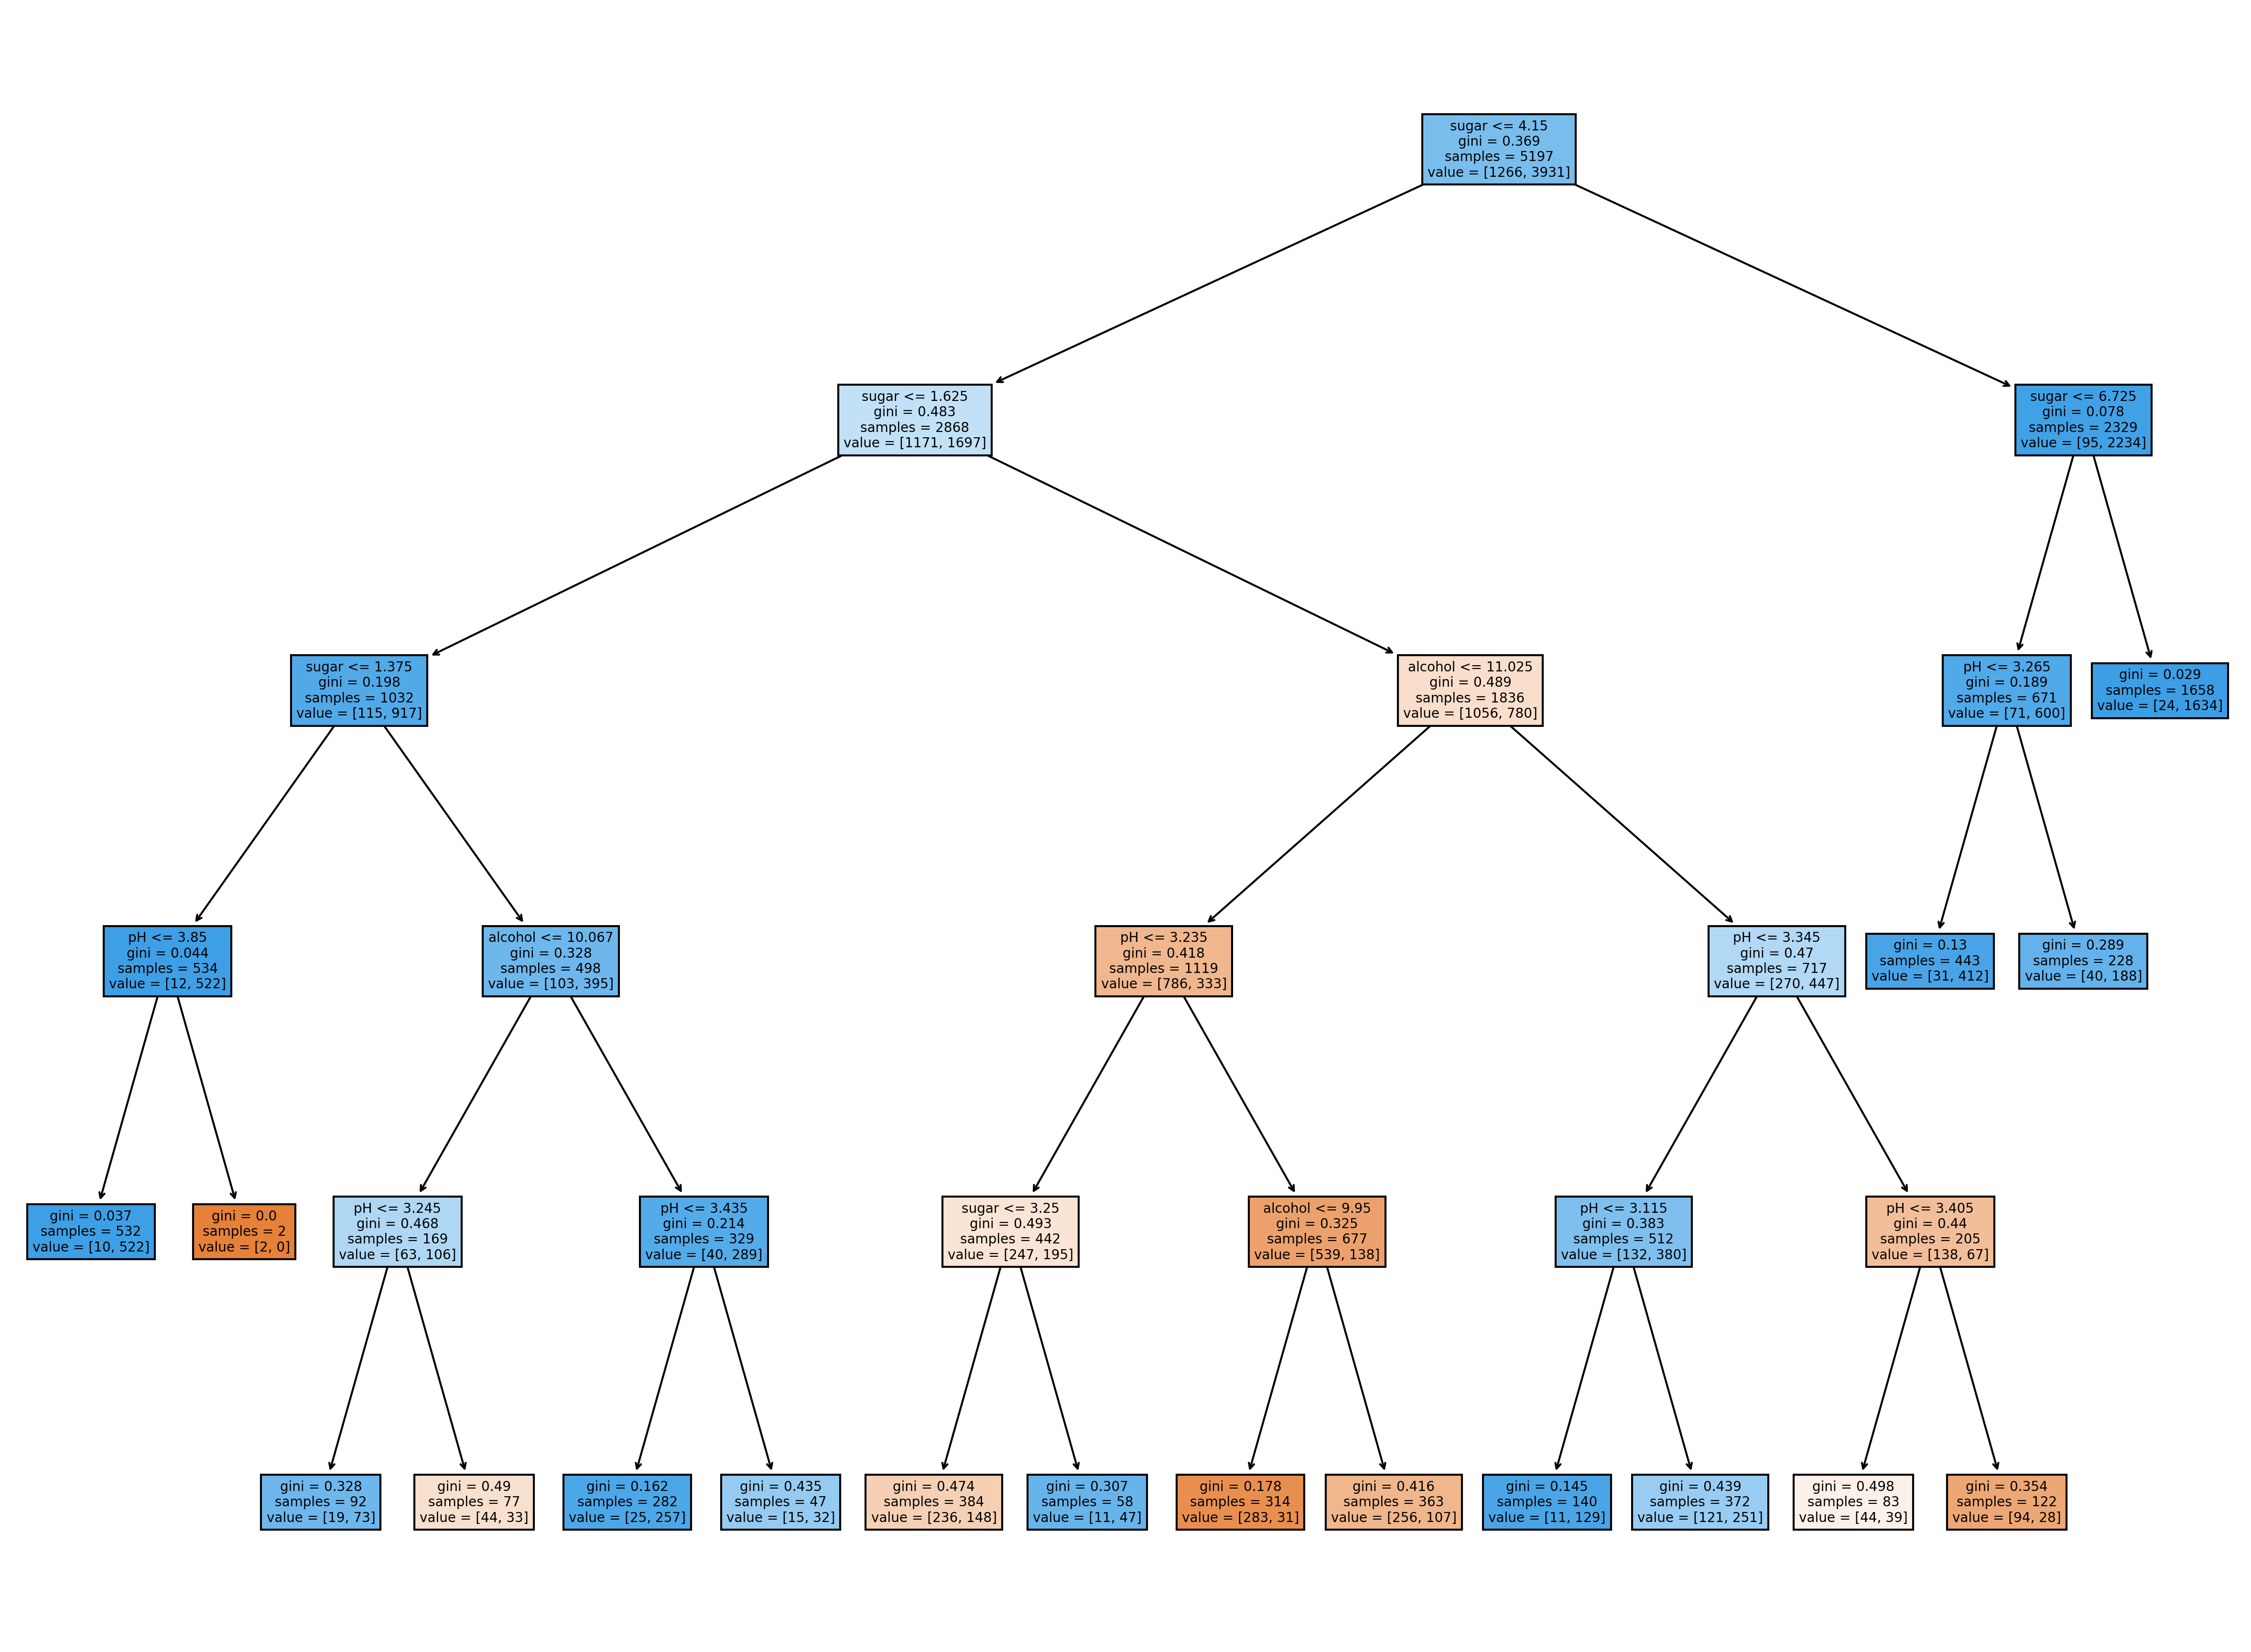

In [ ]:
plt.figure(figsize=(20,15), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()